In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import pandas as pd
import arviz as az

# Bayesian Logistic regression

#### Bayesian logistic regression is a type of logistic regression that uses Bayesian inference to estimate the parameters of the model. Bayesian inference is a method of statistical inference that uses Bayes' theorem to update the probability of a hypothesis given new evidence.

In [4]:
#create fake data
n = 1000
df = pd.DataFrame({
    'x1' : np.random.normal(0, 1, n),
    'x2' : np.random.normal(0,1, n),
    'y'  : np.random.binomial(1,0.5, n)
})

In [7]:
#set up model
with pm.Model() as Logisticreg:
    #priors
    α = pm.Normal('α', mu = 0, sd =1)
    β = pm.Normal('β', mu =0, sd=1, shape =2)
    #likelihood
    p = pm.math.invlogit(α + β[0] * df['x1'] + β[1]*df['x2'])
    y_obs = pm.Binomial('y_obs', n =1, p =p, observed = df['y'] )
    #sample
    trace = pm.sample(1000, tune = 1000)

<ipython-input-7-653121d71d4d>:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, tune = 1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Mfund\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'α'}>,
        <AxesSubplot:title={'center':'α'}>],
       [<AxesSubplot:title={'center':'β'}>,
        <AxesSubplot:title={'center':'β'}>]], dtype=object)

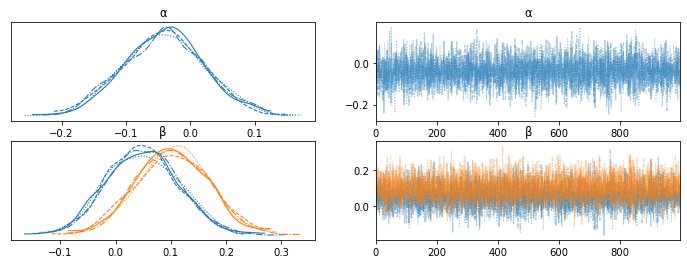

In [9]:
az.plot_trace(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Mfund\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'α'}>,
       <AxesSubplot:title={'center':'β\n0'}>,
       <AxesSubplot:title={'center':'β\n1'}>], dtype=object)

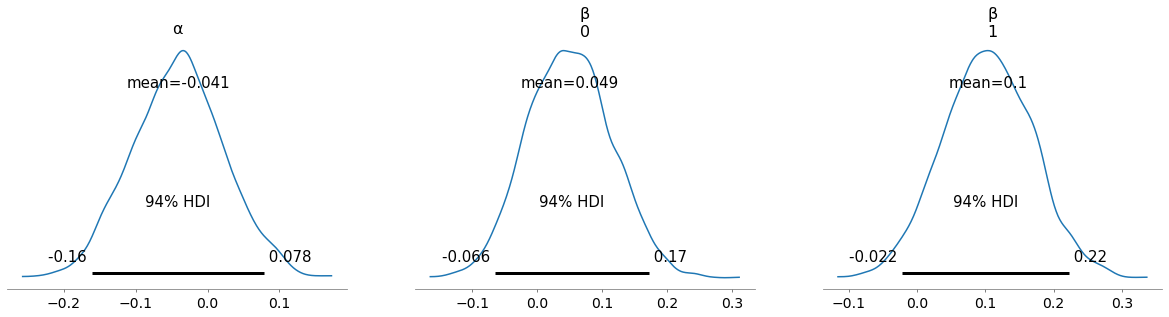

In [11]:
az.plot_posterior(trace)

In [12]:
az.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Mfund\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,-0.041,0.064,-0.161,0.078,0.001,0.001,5143.0,2854.0,1.0
β[0],0.049,0.065,-0.066,0.171,0.001,0.001,5591.0,3187.0,1.0
β[1],0.104,0.065,-0.022,0.223,0.001,0.001,5890.0,3010.0,1.0


In [13]:
az.rhat(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Mfund\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<xarray.Dataset>
Dimensions:  (β_dim_0: 2)
Coordinates:
  * β_dim_0  (β_dim_0) int32 0 1
Data variables:
    α        float64 1.0
    β        (β_dim_0) float64 1.001 1.002

<ipython-input-15-db7a53547537>:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  pm.autocorrplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'α\n0'}>,
        <AxesSubplot:title={'center':'α\n1'}>,
        <AxesSubplot:title={'center':'α\n2'}>],
       [<AxesSubplot:title={'center':'α\n3'}>,
        <AxesSubplot:title={'center':'β\n0, 0'}>,
        <AxesSubplot:title={'center':'β\n0, 1'}>],
       [<AxesSubplot:title={'center':'β\n1, 0'}>,
        <AxesSubplot:title={'center':'β\n1, 1'}>,
        <AxesSubplot:title={'center':'β\n2, 0'}>],
       [<AxesSubplot:title={'center':'β\n2, 1'}>,
        <AxesSubplot:title={'center':'β\n3, 0'}>,
        <AxesSubplot:title={'center':'β\n3, 1'}>]], dtype=object)

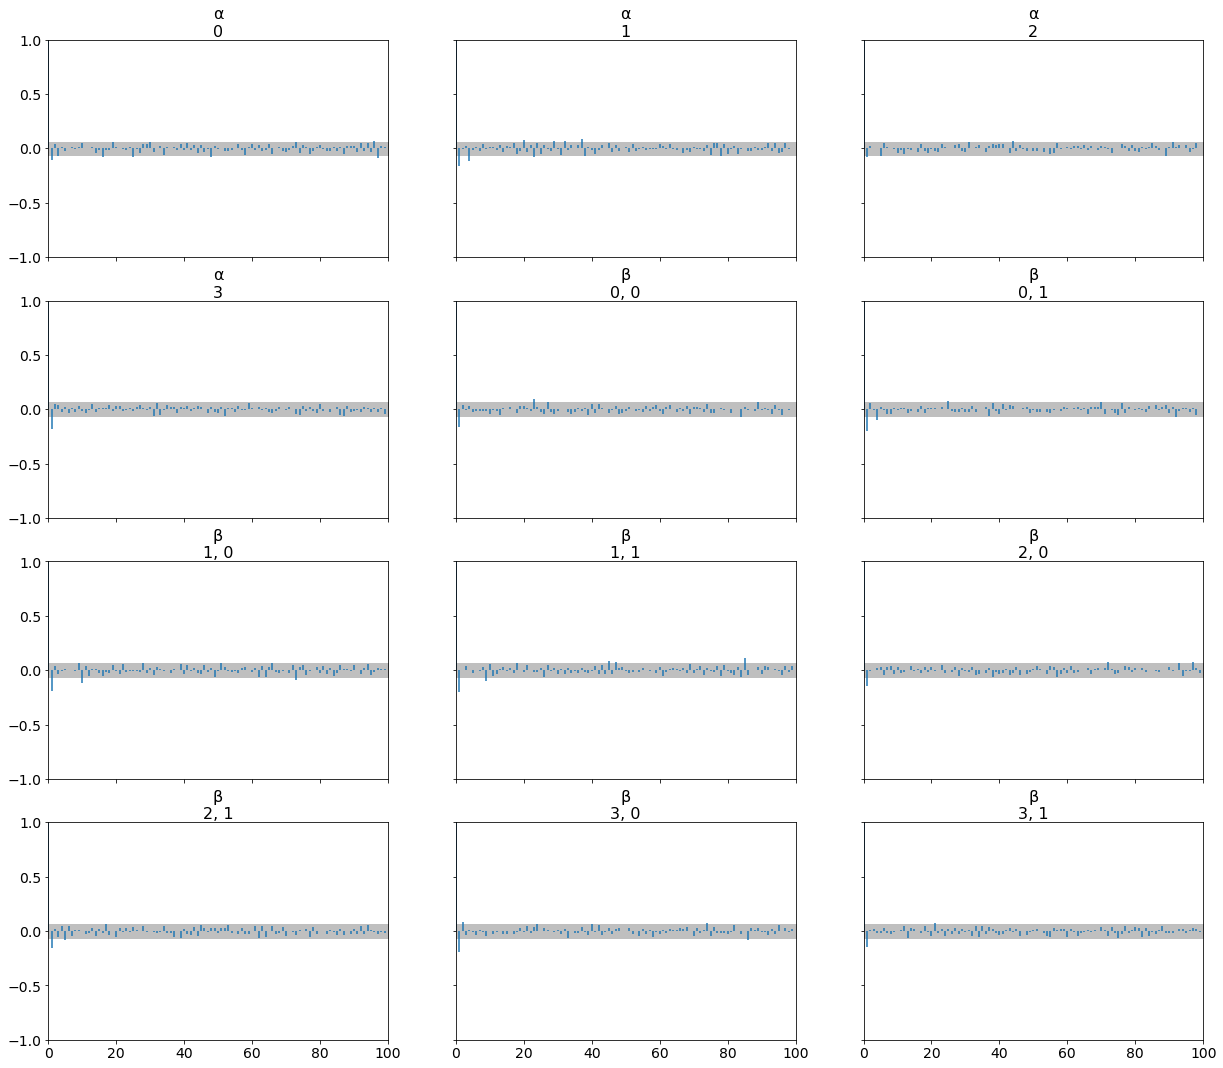

In [15]:
pm.autocorrplot(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Mfund\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'α'}>,
        <AxesSubplot:title={'center':'β\n0'}>,
        <AxesSubplot:title={'center':'β\n1'}>]], dtype=object)

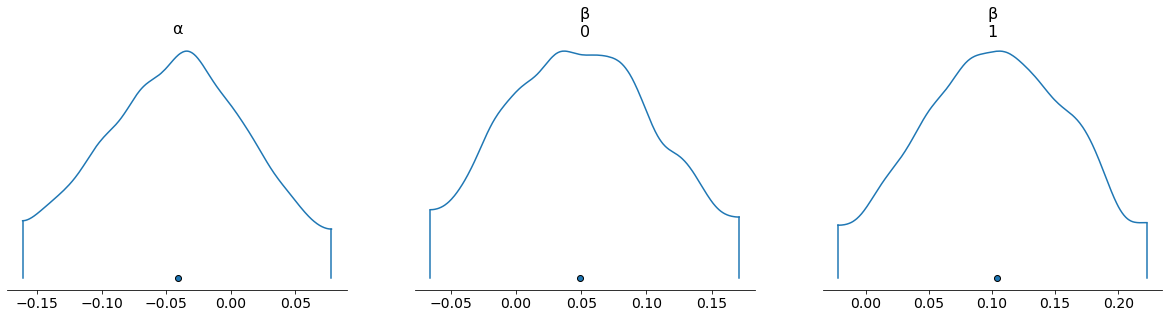

In [16]:
az.plot_density(trace, var_names=['α','β'])